In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

titanicTrain=pd.read_csv('train.csv')
titanicTest=pd.read_csv('test.csv')
genderSubmission=pd.read_csv('gender_submission.csv')
merged_df = pd.merge(titanicTest, genderSubmission, on='PassengerId')

df = pd.concat([titanicTrain, merged_df], ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [4]:
#check for imbalanced data
df['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

In [5]:
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols
num_cols.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
df['Age'].value_counts()

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [8]:
df.drop('Cabin', axis=1, inplace=True)
#df.drop('PassengerId', axis=1, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
df[df.duplicated()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


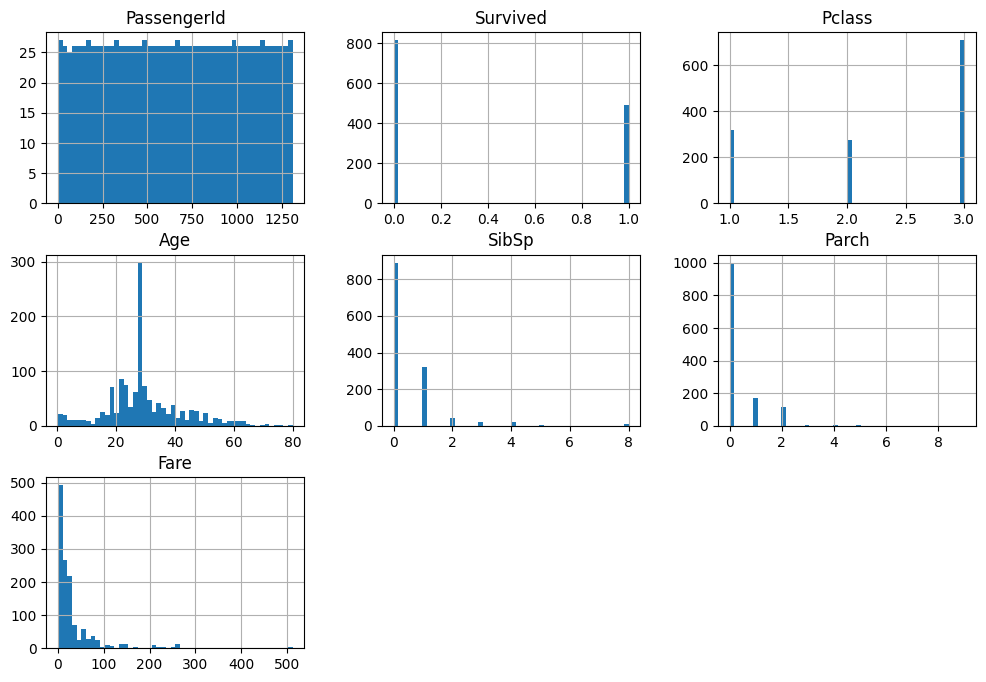

In [10]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [11]:
df['Surname'] = df['Name'].str.extract(r'(\w+),')
df['Ticket_clean'] = df['Ticket'].str.replace(r'\d$', 'X', regex=True)
df['GroupId'] = (
    df['Surname'] + '-' +
    df['Pclass'].astype(str) + '-' +
    df['Ticket_clean'] + '-' +
    df['Fare'].astype(str) + '-' +
    df['Embarked']
)
df.loc[df['PassengerId'].isin([195, 1067, 59, 473, 1142]), ['Name', 'GroupId']]



,Name,GroupId
58,"West, Miss. Constance Mirium",West-2-C.A. 3465X-27.75-S
194,"Brown, Mrs. James Joseph (Margaret Tobin)",Brown-1-PC 1761X-27.7208-C
472,"West, Mrs. Edwy Arthur (Ada Mary Worth)",West-2-C.A. 3465X-27.75-S
1066,"Brown, Miss. Edith Eileen",Brown-2-2975X-39.0-S
1141,"West, Miss. Barbara J",West-2-C.A. 3465X-27.75-S


In [12]:
df.loc[df['PassengerId'].isin([312, 743, 91, 951, 956,1034]), ['Name', 'GroupId']]


,Name,GroupId
90,"Christmann, Mr. Emil",Christmann-3-34327X-8.05-S
311,"Ryerson, Miss. Emily Borie",Ryerson-1-PC 1760X-262.375-C
742,"Ryerson, Miss. Susan Parker ""Suzette""",Ryerson-1-PC 1760X-262.375-C
950,"Chaudanson, Miss. Victorine",Chaudanson-1-PC 1760X-262.375-C
955,"Ryerson, Master. John Borie",Ryerson-1-PC 1760X-262.375-C
1033,"Ryerson, Mr. Arthur Larned",Ryerson-1-PC 1760X-262.375-C


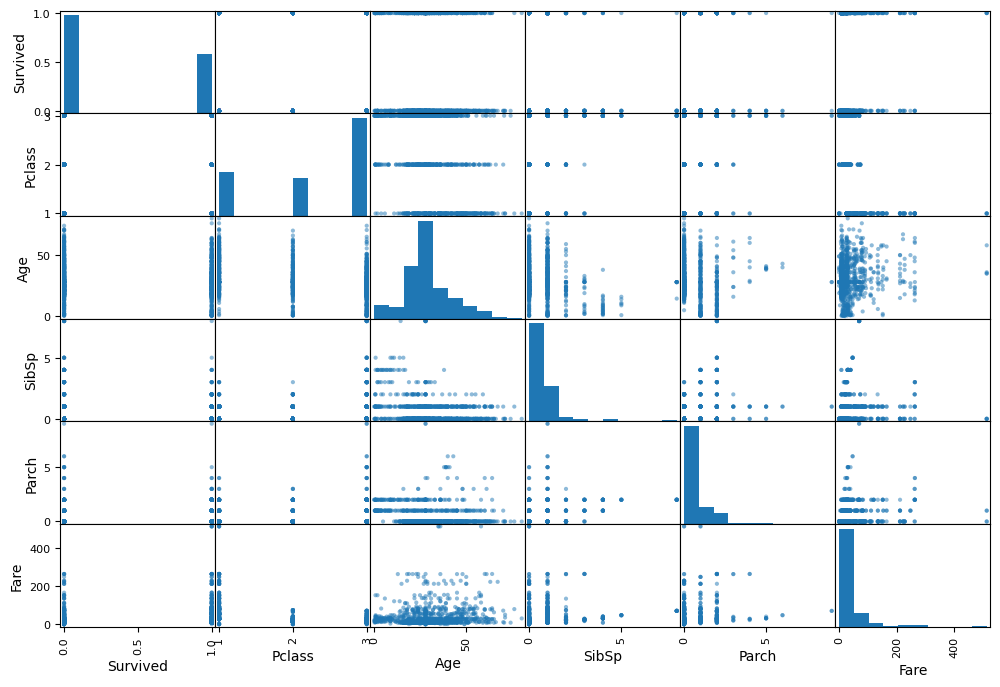

In [13]:
attributes = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [14]:
#df.drop(columns=['Name'], inplace=True)

In [15]:

categorical_cols = df.select_dtypes(include='object').columns

cat_encoder = OneHotEncoder(sparse_output=False)

encoded = cat_encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=cat_encoder.get_feature_names_out(categorical_cols))

final_df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

final_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward",...,GroupId_Young-1-PC 1776X-135.6333-C,GroupId_Youseff-3-262X-7.225-C,GroupId_Yousif-3-264X-7.225-C,GroupId_Yousseff-3-262X-14.4583-C,GroupId_Yrois-2-24874X-13.0-S,GroupId_Zabour-3-266X-14.4542-C,GroupId_Zakarian-3-265X-7.225-C,GroupId_Zakarian-3-267X-7.225-C,GroupId_Zimmerman-3-31508X-7.875-S,GroupId_hoef-1-11124X-33.5-S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Drop all rows with any NaN values
print(final_df.shape)
final_df = final_df.dropna()
print(final_df.shape)


# Use the fully encoded DataFrame for SMOTE
X = final_df.drop("Survived", axis=1)
y = final_df["Survived"]

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())
X_resampled.value_counts() 

(1309, 4558)
(1305, 4558)
Survived
0.0    813
1.0    813
Name: count, dtype: int64


PassengerId  Pclass    Age        SibSp     Parch    Fare       Name_Abbing, Mr. Anthony  Name_Abbott, Master. Eugene Joseph  Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelseth, Miss. Karen Marie  Name_Abelseth, Mr. Olaus Jorgensen  Name_Abelson, Mr. Samuel  Name_Abelson, Mrs. Samuel (Hannah Wizosky)  Name_Abrahamsson, Mr. Abraham August Johannes  Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)  Name_Adahl, Mr. Mauritz Nils Martin  Name_Adams, Mr. John  Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  Name_Aks, Master. Philip Frank  Name_Aks, Mrs. Sam (Leah Rosen)  Name_Albimona, Mr. Nassef Cassem  Name_Aldworth, Mr. Charles Augustus  Name_Alexander, Mr. William  Name_Alhomaki, Mr. Ilmari Rudolf  Name_Ali, Mr. Ahmed  Name_Ali, Mr. William  Name_Allen, Miss. Elisabeth Walton  Name_Allen, Mr. William Henry  Name_Allison, Master. Hudson Trevor  Name_Allison, Miss. Helen Loraine  Name_Allison, Mr. Hudson Joshua Creighton  Name_Allison, Mrs. Hudson J C

In [17]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [18]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


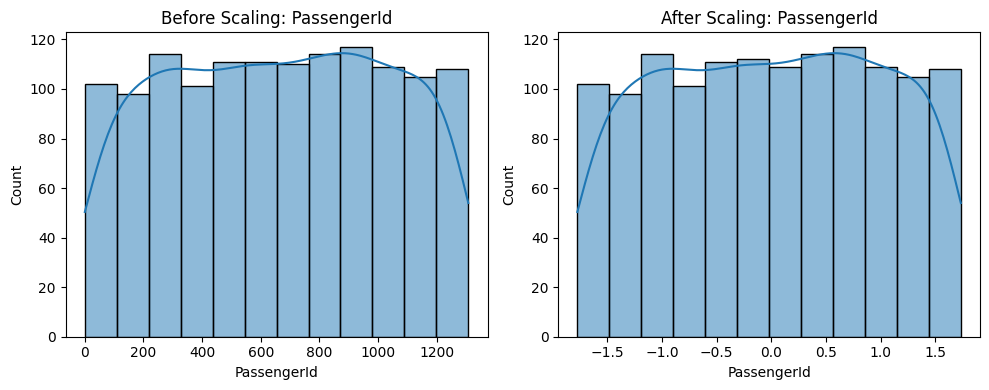

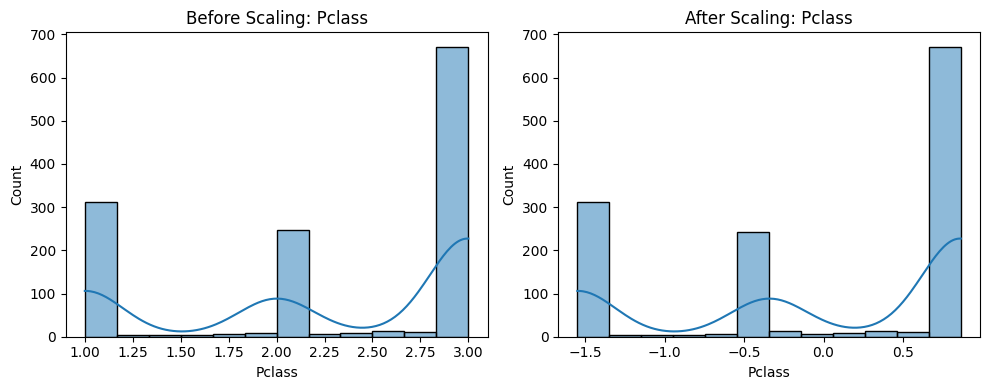

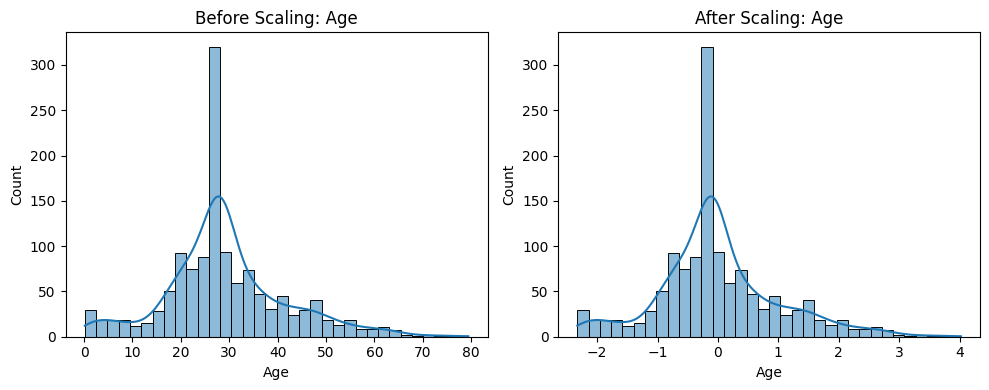

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert X_train and X_train_scaled to DataFrames for plotting
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Plot histograms for the first 3 features (change number as needed)
features_to_plot = X.columns[:3]

for feature in features_to_plot:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(X_train_df[feature], kde=True)
    plt.title(f"Before Scaling: {feature}")

    plt.subplot(1, 2, 2)
    sns.histplot(X_train_scaled_df[feature], kde=True)
    plt.title(f"After Scaling: {feature}")

    plt.tight_layout()
    plt.show()


In [20]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

for d in range(1, 25):
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"Depth={d}: F1 Score = {f1:.4f}")


Depth=1: F1 Score = 0.6435
Depth=2: F1 Score = 0.6435
Depth=3: F1 Score = 0.5900
Depth=4: F1 Score = 0.6593
Depth=5: F1 Score = 0.7119
Depth=6: F1 Score = 0.7386
Depth=7: F1 Score = 0.7483
Depth=8: F1 Score = 0.7492
Depth=9: F1 Score = 0.7524
Depth=10: F1 Score = 0.7484
Depth=11: F1 Score = 0.7516
Depth=12: F1 Score = 0.7613
Depth=13: F1 Score = 0.7660
Depth=14: F1 Score = 0.7725
Depth=15: F1 Score = 0.7730
Depth=16: F1 Score = 0.7805
Depth=17: F1 Score = 0.7855
Depth=18: F1 Score = 0.7818
Depth=19: F1 Score = 0.7818
Depth=20: F1 Score = 0.7818
Depth=21: F1 Score = 0.7818
Depth=22: F1 Score = 0.7855
Depth=23: F1 Score = 0.7855
Depth=24: F1 Score = 0.7855


In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats


param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [0.1, 1, 5],  # L2 regularization
    'reg_alpha': [0, 0.1, 1]    # L1 regularization
}

xgb = XGBClassifier( eval_metric='logloss', random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,               # Try 25 combinations
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_scaled, y_train)

print("Best XGB Params:", random_search_xgb.best_params_)
print("Best XGB CV Score:", random_search_xgb.best_score_)

# Use the best estimator to predict on test set
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

from sklearn.metrics import f1_score, classification_report
print("Test F1 Score (XGB):", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best XGB Params: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best XGB CV Score: 0.7607692307692308
Test F1 Score (XGB): 0.7507692307692307
              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75       165
         1.0       0.74      0.76      0.75       161

    accuracy                           0.75       326
   macro avg       0.75      0.75      0.75       326
weighted avg       0.75      0.75      0.75       326



In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import scipy.stats as stats

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 8, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # Number of random combos to try
    cv=5,                   # 5-fold cross-validation          
    random_state=42,
    verbose=1,
    n_jobs=-1               # Use all cores
)


random_search.fit(X_train_scaled, y_train)


print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Train best model on full training set
best_rf = random_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)

# Evaluate on test set
from sklearn.metrics import f1_score, classification_report

y_pred = best_rf.predict(X_test_scaled)
print("Test F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best CV Score: 0.7246153846153847
Test F1 Score: 0.7186440677966102
              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77       165
         1.0       0.79      0.66      0.72       161

    accuracy                           0.75       326
   macro avg       0.75      0.74      0.74       326
weighted avg       0.75      0.75      0.74       326



In [23]:
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],            # Regularization strength
    'penalty': ['l2'],                              # L2 regularization (stable for most solvers)
    'solver': ['liblinear', 'lbfgs'],               # Solvers that support L2
    'max_iter': [100, 300, 500, 1000],
    'class_weight': [None, 'balanced']              # Try reweighting for class imbalance
}

lr = LogisticRegression()

random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=15,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_lr.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search_lr.best_params_)
print("Best Cross-Val F1 Score:", random_search_lr.best_score_)

# Evaluate on test set
best_lr = random_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

print("Test F1 Score:", f1_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 10}
Best Cross-Val F1 Score: 0.7776026834084163
Test F1 Score: 0.8169014084507042
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78       165
         1.0       0.75      0.90      0.82       161

    accuracy                           0.80       326
   macro avg       0.81      0.80      0.80       326
weighted avg       0.81      0.80      0.80       326



In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define individual base models
rf_model = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=2,min_samples_split=2, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier( subsample=0.6,reg_lambda=5,reg_alpha=1,n_estimators=100,max_depth=10,learning_rate=0.1,gamma=0.5,colsample_bytree=0.8,eval_metric='logloss', random_state=42)



# Create the ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # soft voting averages probabilities
)

# Train the ensemble
voting_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = voting_clf.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred, pos_label=1)
cv_scores = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')


# Evaluate performance
print("Cross-Validation Score:", cv_scores.mean())
print("F1 Score:", f1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Cross-Validation Score: 0.8200000000000001
F1 Score: 0.8530259365994236
Accuracy: 0.843558282208589
Confusion Matrix:
 [[127  38]
 [ 13 148]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.77      0.83       165
         1.0       0.80      0.92      0.85       161

    accuracy                           0.84       326
   macro avg       0.85      0.84      0.84       326
weighted avg       0.85      0.84      0.84       326



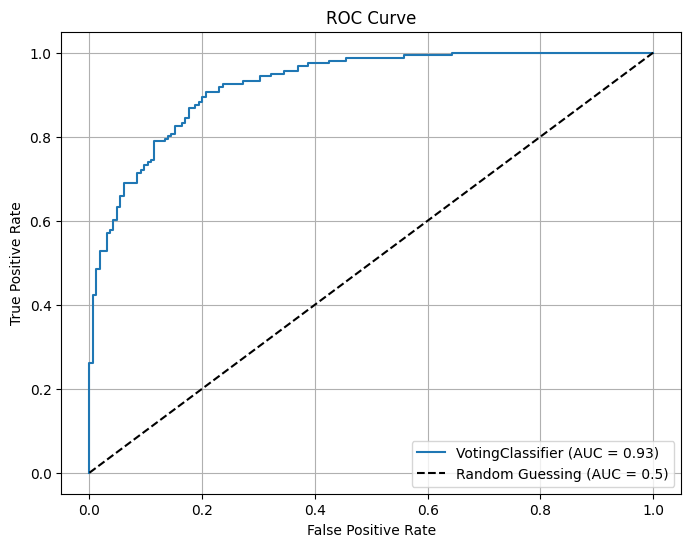

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability that each sample belongs to class 1 (Survived)
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'VotingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


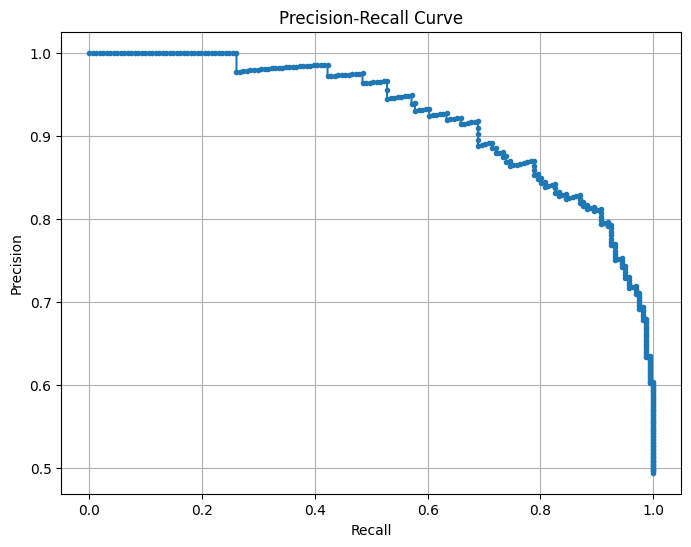

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


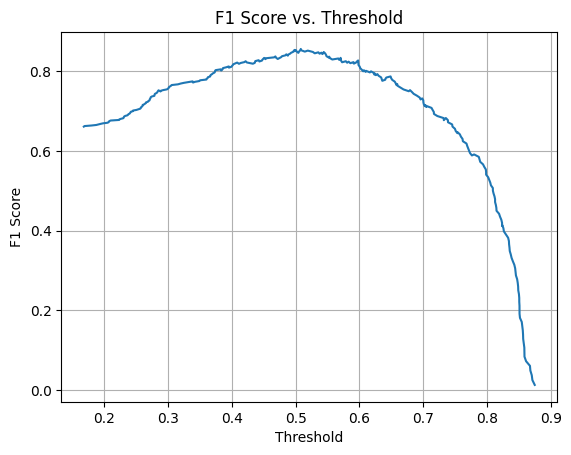

In [27]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

plt.plot(thresholds, f1_scores[:-1])
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold")
plt.grid(True)
plt.show()


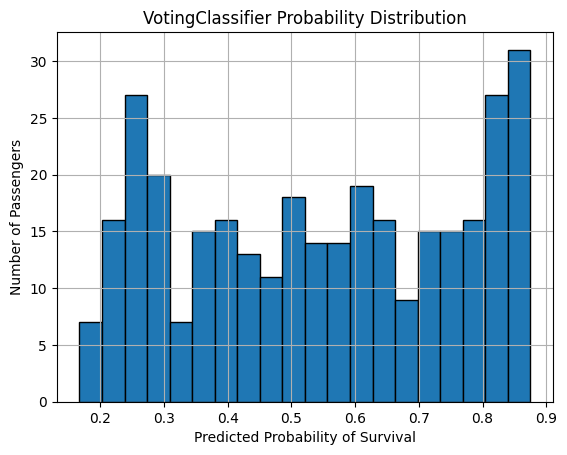

In [28]:
#Class Probability Histogram. Visualizes the distribution of predicted probabilities.


plt.hist(y_proba, bins=20, edgecolor='k')
plt.xlabel("Predicted Probability of Survival")
plt.ylabel("Number of Passengers")
plt.title("VotingClassifier Probability Distribution")
plt.grid(True)
plt.show()


C:\Users\bahey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


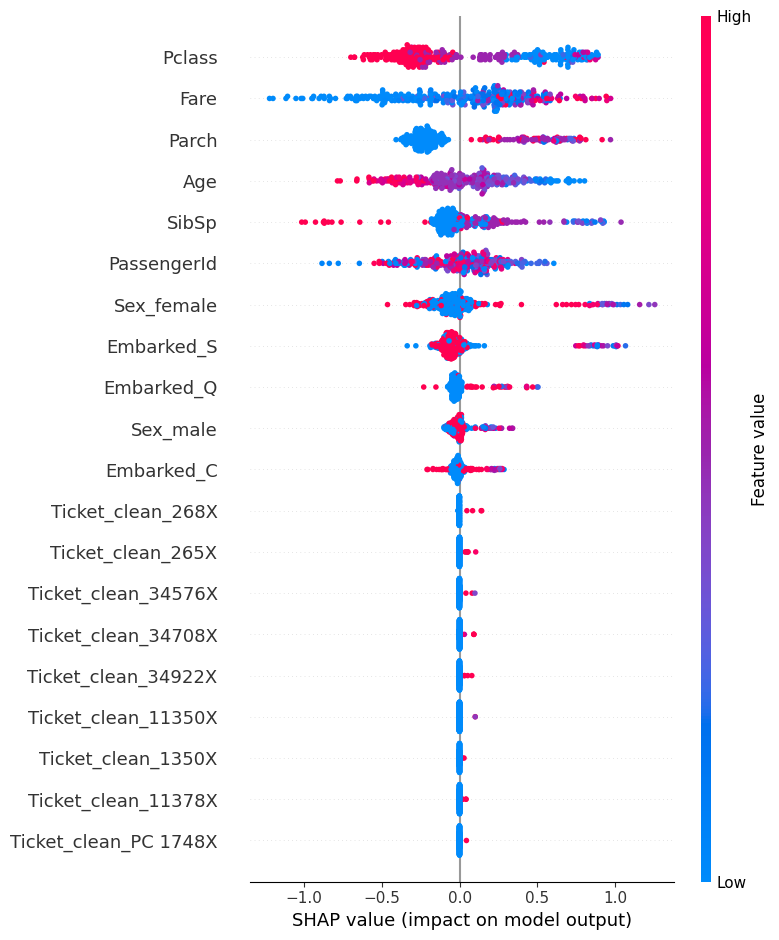

In [29]:
import shap

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


# Titanic Survival Prediction Using Ensemble Machine Learning Models

**Overview:**  
This machine learning project explores survival prediction on the Titanic dataset using an ensemble of fine-tuned classification models. The goal is to build an accurate classifier that predicts whether a passenger survived, leveraging data preprocessing, feature engineering, model tuning, ensemble techniques, and interpretability tools.

---

**Dataset Description:**  
The dataset comes from Kaggle's Titanic competition and includes:

- `train.csv`: Passenger data with survival labels  
- `test.csv`: Passenger data without labels  
- `gender_submission.csv`: Ground truth for test.csv

**Columns Used:**  
- *Categorical*: `Sex`, `Embarked`, `Ticket`, `Name`  
- *Numerical*: `Pclass`, `Age`, `Fare`, `SibSp`, `Parch`  
- *Dropped*: `Cabin` (too many missing), `PassengerId` retained for ID

---

**Data Preprocessing:**
1. Merged test and gender_submission into a labeled dataset.
2. Combined with training data to create a full DataFrame.
3. Filled missing `Age` and `Fare` with median values.
4. Dropped rows with remaining nulls.
5. One-hot encoded categorical variables.
6. Applied SMOTE to balance survival classes.
7. Scaled features with `StandardScaler`.

**Feature Engineering:**
- Extracted `Surname` from `Name`
- Cleaned `Ticket` by removing last digit (`Ticket_clean`)
- Created `GroupId`: `Surname-Pclass-Ticket_clean-Fare-Embarked` to capture family travel groups

**Exploratory Data Analysis (EDA):**
- Histogram of features
- Scatter matrix of numerical variables

---

**Modeling:**  
Trained and fine-tuned the following models:

<div style="
    display: grid;
    grid-template-columns: repeat(auto-fit, minmax(160px, 1fr));
    gap: 0.7rem;
    margin: 1rem 0;
    font-size: 0.85em;
">

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">Decision Tree</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>Depths 1–24 tested</li>
<li>F1 peaked at mid-range</li>
</ul>
</div>

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">XGBoost</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>Tuned with RandomizedSearchCV</li>
<li>Best params: <br> n_estimators, max_depth, learning_rate, etc.</li>
<li>High F1 on test set</li>
</ul>
</div>

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">Random Forest</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>Tuned with RandomizedSearchCV</li>
<li>Best params: n_estimators, max_depth, etc.</li>
<li>Trained on scaled data</li>
</ul>
</div>

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">Logistic Regression</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>Tuned with RandomizedSearchCV</li>
<li>Params: C, penalty, solver, etc.</li>
</ul>
</div>

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">Voting Ensemble</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>Soft voting: RF, XGB, LR</li>
<li><b>F1 Score: 0.853</b> on test set</li>
</ul>
</div>

</div>

---

**Model Evaluation:**
- Cross-validation accuracy
- Final confusion matrix
- Classification report (precision, recall, F1)

**Visualization and Interpretability:**
- **ROC Curve:** Area under curve (AUC) shows strong model separation
- **Precision-Recall Curve:** Assesses balance between precision and recall
- **F1 vs. Threshold Plot:** Identifies optimal probability threshold
- **Probability Distribution Histogram:** Visualizes confidence in predictions
- **SHAP Summary Plot:** Interprets feature importance in XGBoost model

**SHAP Highlights:**
- Most influential: `Pclass`, `Fare`, `Sex`, `Age`, `SibSp`, `Parch`
- Higher class/fare increased survival probability
- Being female or young significantly boosted chances

---

**Conclusion:**  
The ensemble Voting Classifier, with fine-tuned Random Forest and XGBoost models, provided a robust solution to the Titanic classification problem. The final F1 score of **0.853** reflects strong model performance and generalization. Visualizations and SHAP interpretations confirmed that the model relies on historically and logically relevant survival factors. This approach demonstrates the power of ensemble learning and interpretability